TODOs
* use contour plot -- DONE
* critical value of recurrent weight . if large enough, the network can hold non zero response after external input goes away -- DONE
* generate moving input -- DONE
* h = v * t (v is speed) -- DONE
* add noise from 2020 bioxiv paper
* feature space with pref stim using linspace(-L, L, N+1)
* critical value of recurrent -- DONE


In [175]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [176]:
import numpy as np
import network_dynamics as ndyn

# Simulation #1 - Fully connected with Gaussian Kernel

We're looking to see that global inhibition is working, that eventually firing rates plateau when there is no longer external input.

[-3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.5004513
 -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
 -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
 -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
 -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
  2.24399475  2.37222302  2.5004513   2.62867957  2.75690784  2.88513611
  3.01336438  3.14159265]
--------
[[0.         0.12822827 0.25645654 ... 6.02672876 6.15495704 6.28318531]
 [0.12822827 0.         0.12822827 ... 5.89850049 6.02672876 6.15495704]
 [0.25645654 0.12822827 0.         ... 5.77027222 5.89850049 6.02672876]
 ...
 [6.02672876 5.89850049 5.77027222 ... 0.         0.12822827 0.25645654]
 [6.15495704 6.02672876 5.89850049 ... 0.12822827 0.         0.12822827]
 [6.28318531

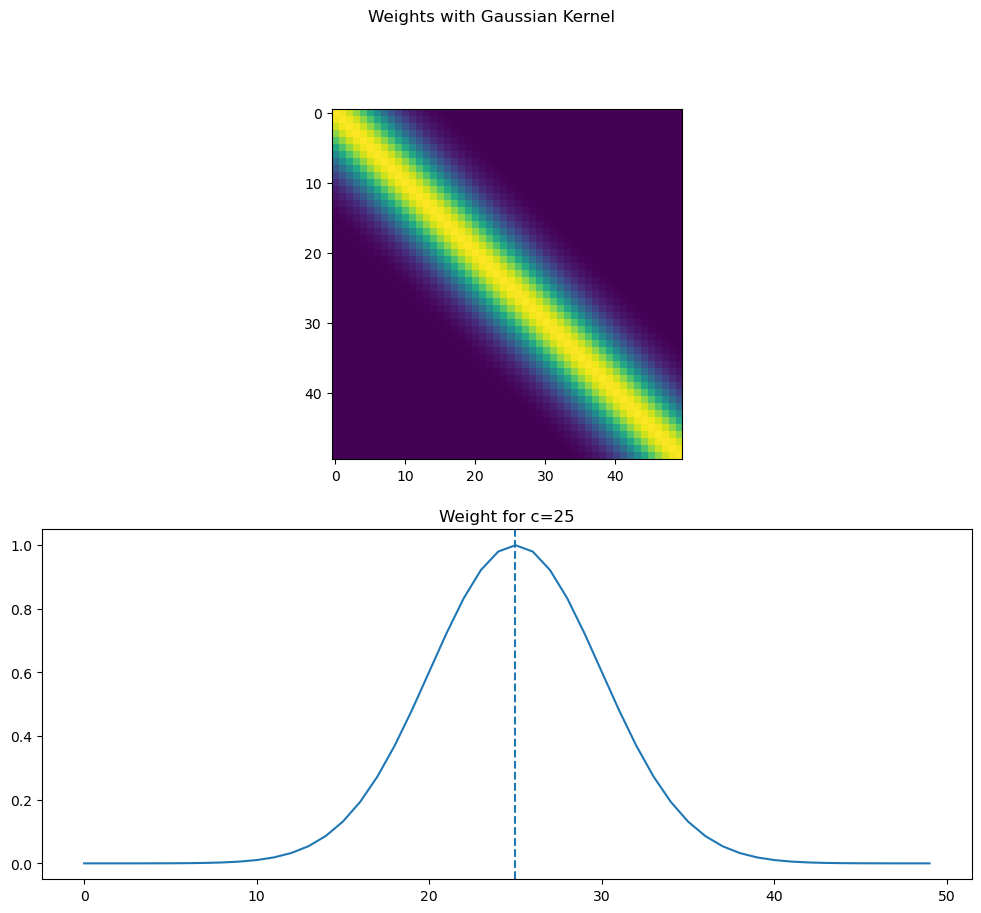

In [177]:
network = ndyn.Network(N=50, T=20, L=np.pi, W_kwargs={'a': np.pi/2})
print(network.prefStim)
ndyn.plot_weight(network, 25, 'Weights with Gaussian Kernel')

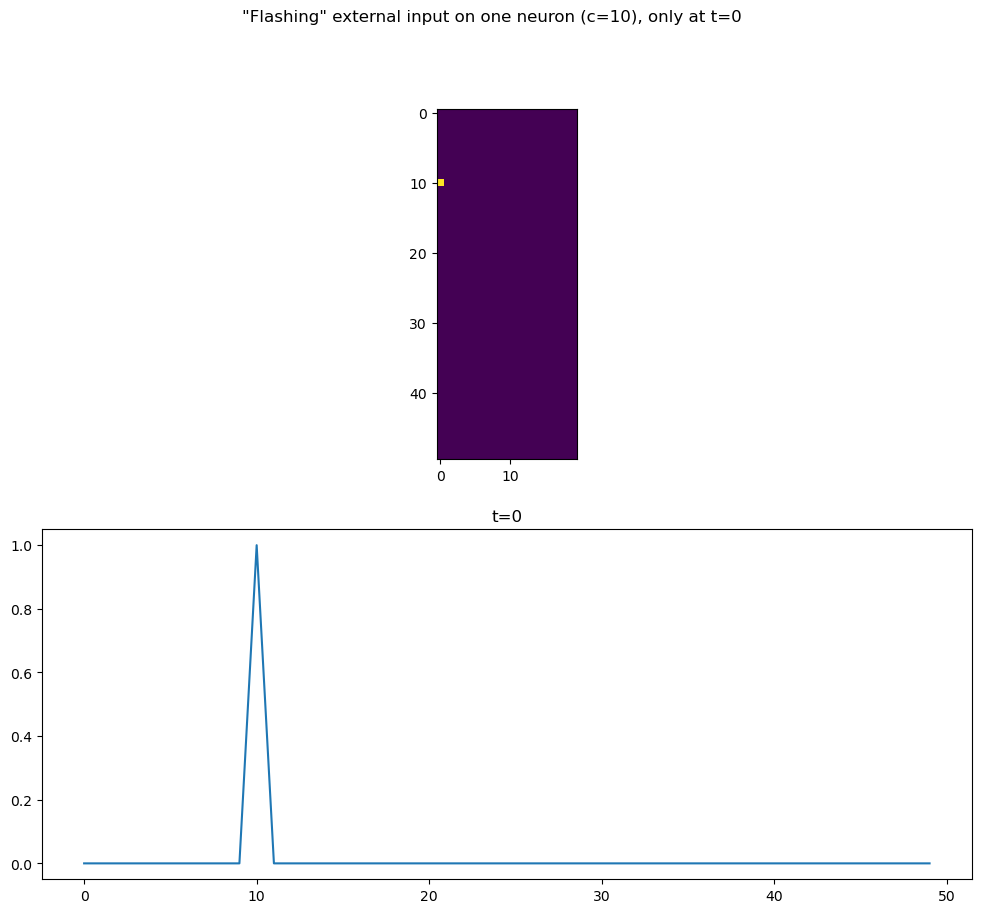

In [178]:
external_input = np.zeros((network.N, network.T))
external_input[10, 0] = 1

ndyn.plot_external_input_at_t(external_input, 0, '"Flashing" external input on one neuron (c=10), only at t=0')

In [179]:
solution = network.simulate(external_input, ndyn.sp_solve_ivp, lambda sol: sol.y)
print(solution)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0  1 ... 18 19]
        y: [[ 0.000e+00  1.350e-02 ...  3.554e-06  2.083e-06]
            [ 0.000e+00  1.957e-02 ...  4.426e-06  2.594e-06]
            ...
            [ 0.000e+00  2.569e-11 ...  3.057e-12  1.791e-12]
            [ 0.000e+00  9.266e-12 ...  1.371e-12  8.035e-13]]
      sol: None
 t_events: None
 y_events: None
     nfev: 158
     njev: 0
      nlu: 0


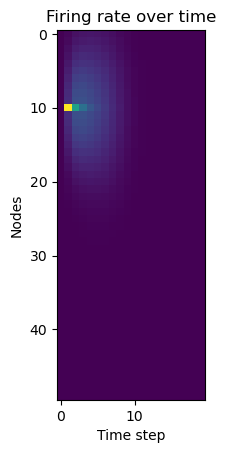

Firing rate diminishes due to global inhibition and a lower recurrent weight


In [180]:
ndyn.plot_firing_rate(network, "Firing rate over time")
print('Firing rate diminishes due to global inhibition and a lower recurrent weight')

# Simulation #2 - "Flashing" external input with strong recurrent weight

We're looking to see that the network maintains the firing rate for a "flashed" input when the recurrent weight is strong.

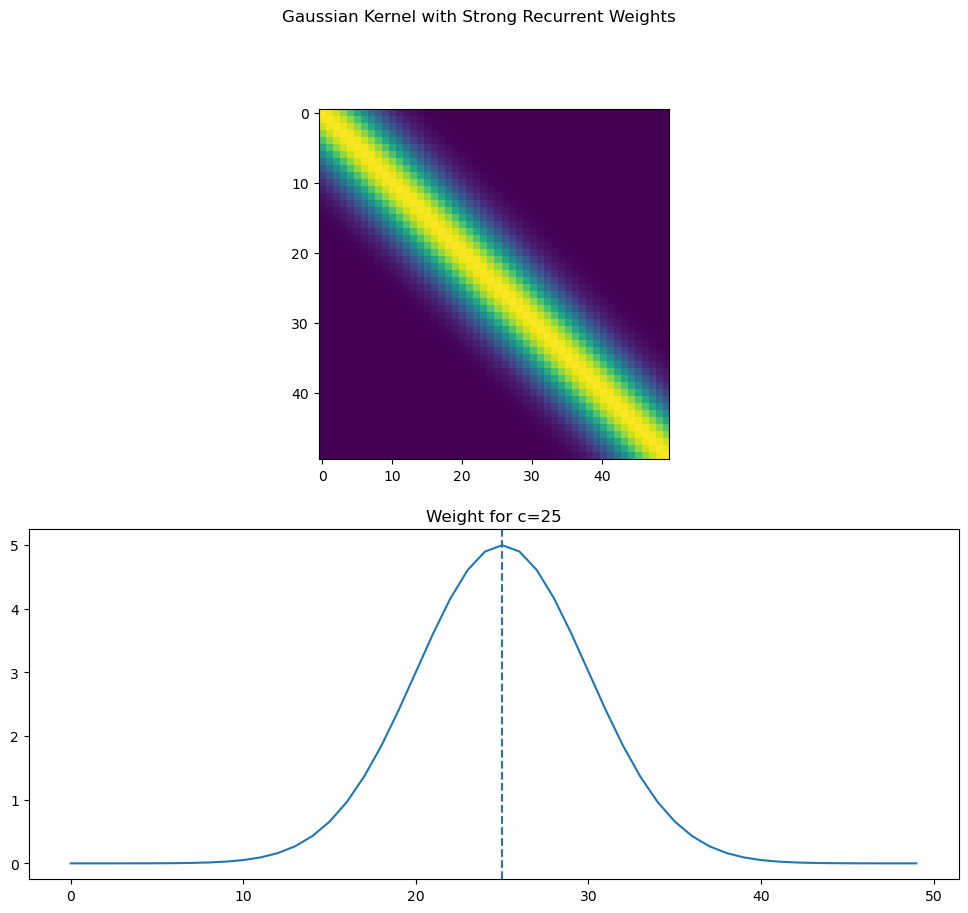

In [188]:
network.W = 5 * ndyn.gaussian_func(ndyn.get_diff_matrix(network.prefStim), a=np.pi/2)
ndyn.plot_weight(network, 25, 'Gaussian Kernel with Strong Recurrent Weights')

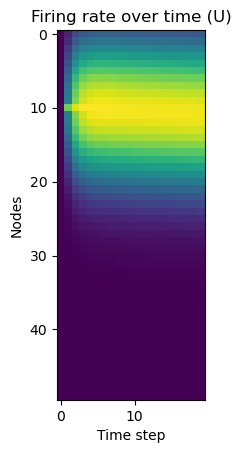

In [189]:
network.simulate(external_input, ndyn.sp_solve_ivp, lambda sol: sol.y)
ndyn.plot_firing_rate(network)

# Simulation 3 - Constant Stimulus with Gaussian Function

[-180.         -172.65306122 -165.30612245 -157.95918367 -150.6122449
 -143.26530612 -135.91836735 -128.57142857 -121.2244898  -113.87755102
 -106.53061224  -99.18367347  -91.83673469  -84.48979592  -77.14285714
  -69.79591837  -62.44897959  -55.10204082  -47.75510204  -40.40816327
  -33.06122449  -25.71428571  -18.36734694  -11.02040816   -3.67346939
    3.67346939   11.02040816   18.36734694   25.71428571   33.06122449
   40.40816327   47.75510204   55.10204082   62.44897959   69.79591837
   77.14285714   84.48979592   91.83673469   99.18367347  106.53061224
  113.87755102  121.2244898   128.57142857  135.91836735  143.26530612
  150.6122449   157.95918367  165.30612245  172.65306122  180.        ]
--------
[[  0.           7.34693878  14.69387755 ... 345.30612245 352.65306122
  360.        ]
 [  7.34693878   0.           7.34693878 ... 337.95918367 345.30612245
  352.65306122]
 [ 14.69387755   7.34693878   0.         ... 330.6122449  337.95918367
  345.30612245]
 ...
 [345.30612245 

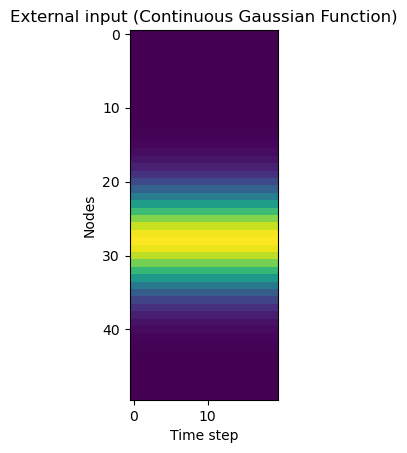

In [190]:
network = ndyn.Network(50, 20)
external_input = ndyn.get_diff_matrix(network.prefStim, 25)
external_input = ndyn.gaussian_func(external_input)
external_input = np.tile(external_input, (1, network.T))
ndyn.plot_external_input(external_input, 'External input (Continuous Gaussian Function)')

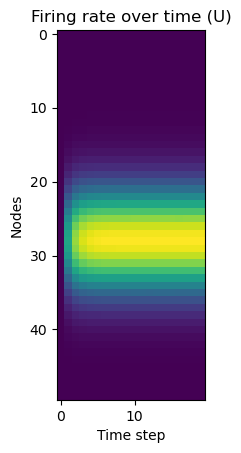

In [191]:
network.simulate(external_input, ndyn.sp_solve_ivp, lambda sol: sol.y)
ndyn.plot_firing_rate(network)

# Simulation - Periodic Stimulus
"To mimic real situations more precisely, such as when the stimulus is the orientation or moving direction of objects, we restrict the stimulus in the simulation to be a periodical variable. More exactly, we consider stimulus x (and so does the preferred stimulus of neurons) in the range (−π, π ], with x = θ and x = 2π + θ being the same. Under this condition, the steady states of the network will no longer have the exact gaussian form as in equation 2.4. However, provided that the value of a is not too large, say, a < π as considered here, the bell shape of steady states still holds, as confirmed by the simulation. With the periodic condition, the form of recurrent interactions is adjusted..." (Wu & Amari 2005)

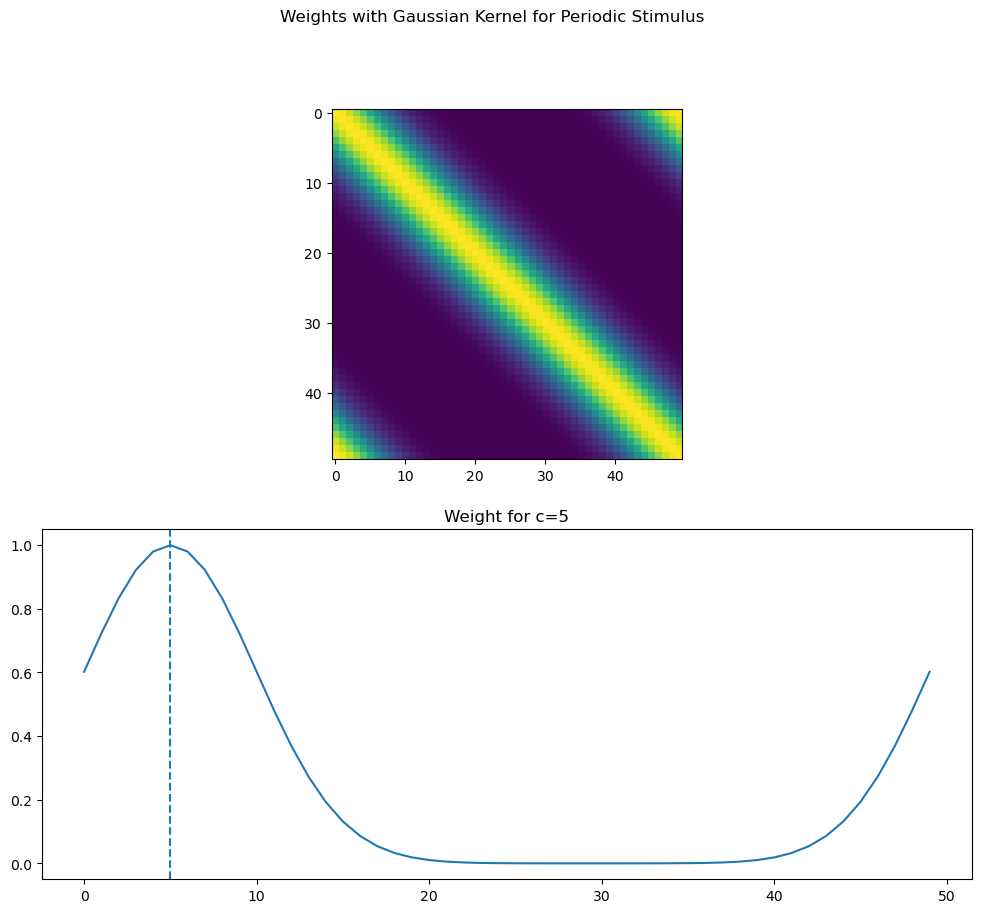

In [203]:
# Weight matrix for periodic stimulus
def diff_matrix_for_periodic_stimulus(nn: ndyn.Network):
    row_indices = nn.prefStim.reshape(-1, 1)
    col_indices = nn.prefStim.reshape(1, -1)
    diff_matrix = np.remainder(np.fabs(col_indices - row_indices) + nn.L, 2 * np.pi) - nn.L

    return diff_matrix

network = ndyn.Network(N=50, T=20, L=np.pi, diff_matrix_func=diff_matrix_for_periodic_stimulus, W_kwargs={'a': np.pi/2})
ndyn.plot_weight(network, 5, 'Weights with Gaussian Kernel for Periodic Stimulus')

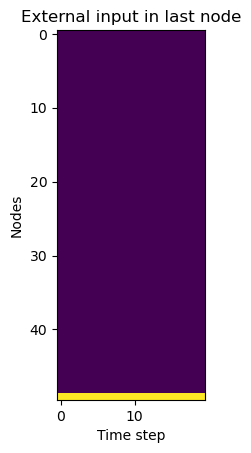

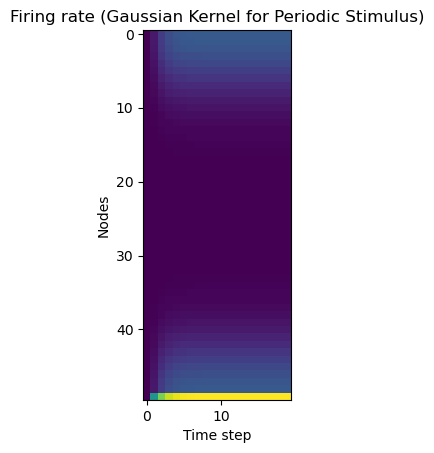

The network whose weights are adjusted for the periodic condition (ring attractor) shows neuronal activity / firing rates "wrapping around" to c=0 when there is activity in the preferred stimulus of c=49.


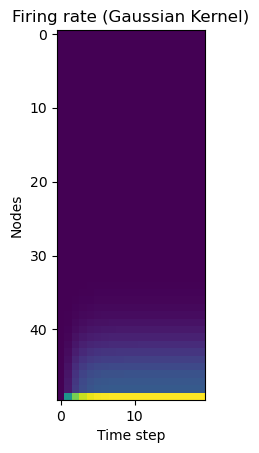

The network which is not adjusted for the periodic condition (line attractor) only shows neuronal activity / firing rates in neighboring neurons c < 49 when there is activity in the preferred stimulus of c=49.


In [204]:
nn_gaussian_kernel = ndyn.Network(N=50, T=20)

external_input = np.zeros((network.N, network.T))
external_input[49] = np.ones(network.T)
ndyn.plot_external_input(external_input, 'External input in last node')
network.simulate(external_input, ivp_func=ndyn.sp_solve_ivp, get_U_func=lambda sol: sol.y)
ndyn.plot_firing_rate(network, 'Firing rate (Gaussian Kernel for Periodic Stimulus)')
print('The network whose weights are adjusted for the periodic condition (ring attractor) shows neuronal activity / firing rates "wrapping around" to c=0 when there is activity in the preferred stimulus of c=49.')
nn_gaussian_kernel.simulate(external_input, ivp_func=ndyn.sp_solve_ivp, get_U_func=lambda sol: sol.y)
ndyn.plot_firing_rate(nn_gaussian_kernel, 'Firing rate (Gaussian Kernel)')
print('The network which is not adjusted for the periodic condition (line attractor) only shows neuronal activity / firing rates in neighboring neurons c < 49 when there is activity in the preferred stimulus of c=49.')

## Moving external input

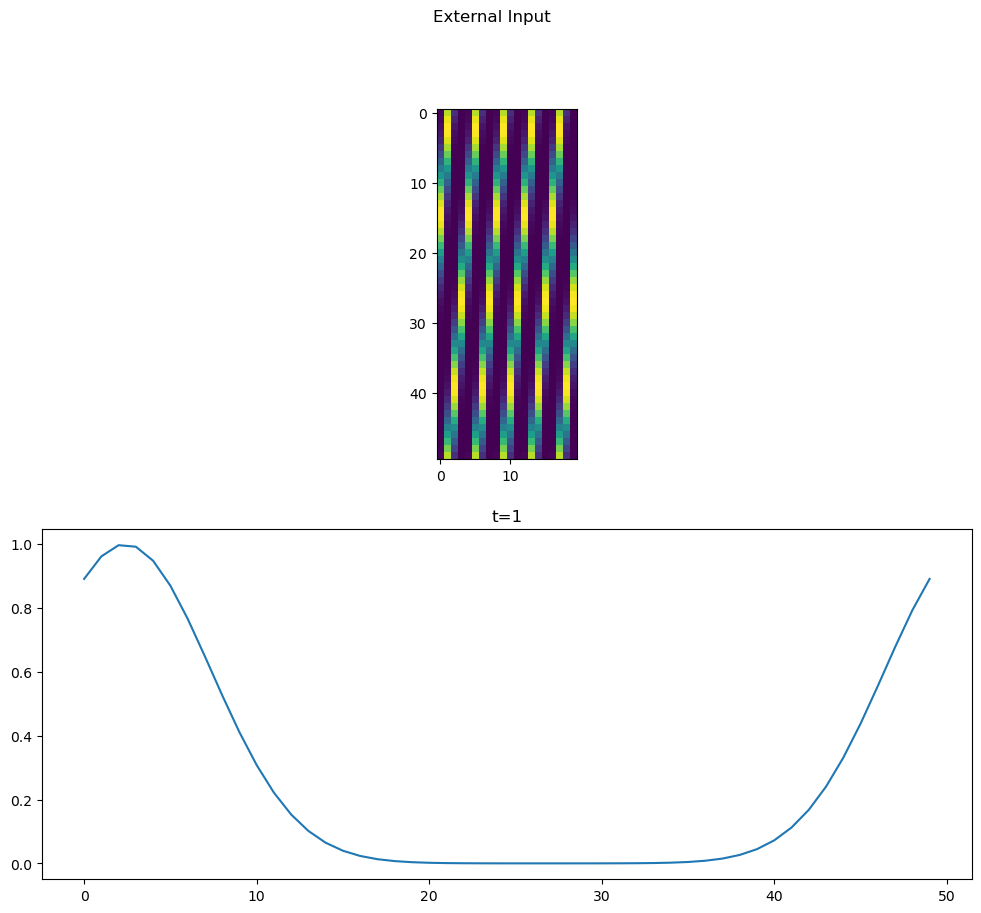

In [219]:
# Moving external input

velocity = np.pi/2
gamma = 1
t = np.tile(np.arange(0, network.T), (network.N, 1))
h = velocity * t
row_indices = network.prefStim.reshape(-1, 1)
row_indices = np.fabs(row_indices - 49) # TODO, c=25 at t=0 is undefined behavior, but it shouldn't be. The gaussian function will diverge
diff_matrix = np.remainder(np.fabs(row_indices - h) + network.L, 2 * np.pi) - network.L
external_input = ndyn.gaussian_func(diff_matrix, a = np.pi / 2)

ndyn.plot_external_input_at_t(external_input, 1)

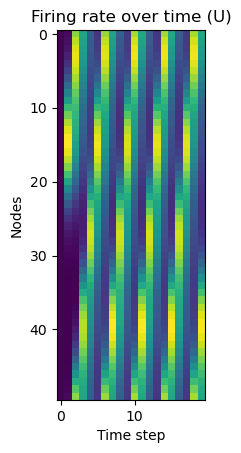

In [220]:
network.simulate(external_input, ndyn.sp_solve_ivp, lambda sol: sol.y)
ndyn.plot_firing_rate(network)